# Pennylane installation

In [ ]:
pip install pennylane --upgrade

# Quantum Circuits

- Instead of the qubit, PennyLane uses the term wires to refer to a quantum subsystem. 
- A circuit is represented as a function. By default all qubits are initialized as |0>.
- The quantum function returns either a single or a tuple of measured observable values by applying a **measurement function**, which in the function below is the **PauliZ operator** to the qubit 1

In [2]:
import pennylane as qml

def quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.PauliZ(1))

To run and optimize a quantum circuit, we need to specify the quantum device on which to execute the circuit. Here we use the ”default.qubit” device, which is a standard quantum simulator. It is instantiated using the device loader as follows

In [5]:
dev = qml.device('default.qubit', wires=2, shots=1000)

## Creating a quantum node

Quantum computations are represented as quantum node objects in PennyLane. A quantum node is an initialization of the quantum circuit, and encapsulates the computation to the specific quantum device that executes the circuit. Quantum nodes can be easily created by using the qnode decorator.

<p style="text-align: center"><img src="images/Qnode.png" width="200" height="100"></p>

QNodes can interact with machine learning libraries such as PyTorch and TensorFlow. This is what allows it to connect the quantum circuit to data structures like TensorFlow tensors and optimizers. By default, QNodes use the NumPy interface.

A QNode is initialized as follows:

In [7]:
circuit = qml.QNode(quantum_function, dev)

##Qnode can also be used as a decorator:
#@qml.qnode(dev)

The QNode is used to compute the result of a quantum circuit and can calculate results classically. For example, we will run the results of the quantum_function by creating a QNode circuit and passing the parameters x and y in the function quantum_function. Then an RZ gate, CNOT and RY will be applied on the circuit.

(<Figure size 600x300 with 1 Axes>, <Axes: >)


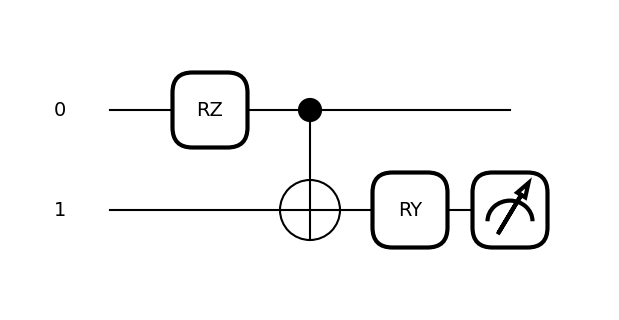

In [10]:
import numpy as np
result = qml.draw_mpl(circuit)(np.pi/3, 0.5)
print(result)